In [4]:
import pandas as pd
import ruptures as rpt
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('../data/cleaned_brent_oil_prices.csv')
print(df.columns)
print(df.head())


Index(['Price', 'Year', 'Month'], dtype='object')
   Price  Year  Month
0  18.63  1987      5
1  18.45  1987      5
2  18.55  1987      5
3  18.60  1987      5
4  18.58  1987      5


In [9]:
print(df.columns)
print(df.index)


Index(['Price'], dtype='object')
DatetimeIndex(['1987-05-01', '1987-05-01', '1987-05-01', '1987-05-01',
               '1987-05-01', '1987-06-01', '1987-06-01', '1987-06-01',
               '1987-06-01', '1987-06-01',
               ...
               '2022-10-01', '2022-10-01', '2022-10-01', '2022-10-01',
               '2022-10-01', '2022-11-01', '2022-11-01', '2022-11-01',
               '2022-11-01', '2022-11-01'],
              dtype='datetime64[ns]', name='Date', length=5015, freq=None)


In [10]:
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Date'] = pd.to_datetime(dict(year=df['Year'], month=df['Month'], day=1))
df.set_index('Date', inplace=True)
df.drop(['Year', 'Month'], axis=1, inplace=True)
print(df.head())
print(df.index)


            Price
Date             
1987-05-01  18.63
1987-05-01  18.45
1987-05-01  18.55
1987-05-01  18.60
1987-05-01  18.58
DatetimeIndex(['1987-05-01', '1987-05-01', '1987-05-01', '1987-05-01',
               '1987-05-01', '1987-06-01', '1987-06-01', '1987-06-01',
               '1987-06-01', '1987-06-01',
               ...
               '2022-10-01', '2022-10-01', '2022-10-01', '2022-10-01',
               '2022-10-01', '2022-11-01', '2022-11-01', '2022-11-01',
               '2022-11-01', '2022-11-01'],
              dtype='datetime64[ns]', name='Date', length=5015, freq=None)


In [11]:
df_monthly = df.resample('MS').mean()
print(df_monthly.head())
print(df_monthly.index)


                Price
Date                 
1987-05-01  18.562000
1987-06-01  18.897273
1987-07-01  19.873636
1987-08-01  19.021250
1987-09-01  18.148000
DatetimeIndex(['1987-05-01', '1987-06-01', '1987-07-01', '1987-08-01',
               '1987-09-01', '1987-10-01', '1987-11-01', '1987-12-01',
               '1988-01-01', '1988-02-01',
               ...
               '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01',
               '2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01',
               '2022-10-01', '2022-11-01'],
              dtype='datetime64[ns]', name='Date', length=427, freq='MS')


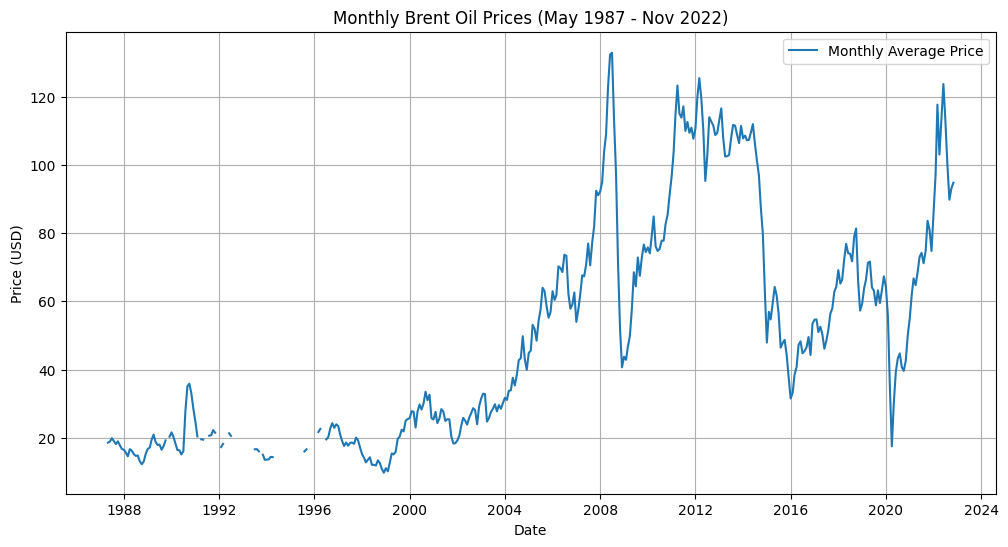

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df_monthly.index, df_monthly['Price'], label='Monthly Average Price')
plt.title('Monthly Brent Oil Prices (May 1987 - Nov 2022)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


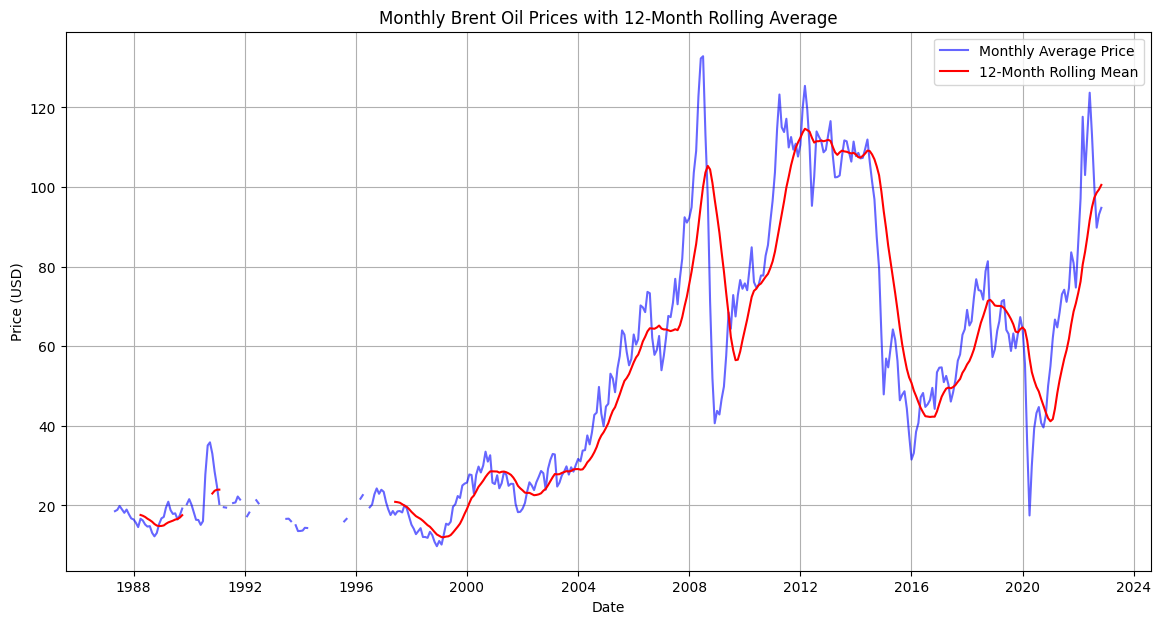

In [13]:
plt.figure(figsize=(14,7))
plt.plot(df_monthly.index, df_monthly['Price'], label='Monthly Average Price', color='blue', alpha=0.6)
plt.plot(df_monthly['Price'].rolling(window=12).mean(), label='12-Month Rolling Mean', color='red')
plt.title('Monthly Brent Oil Prices with 12-Month Rolling Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


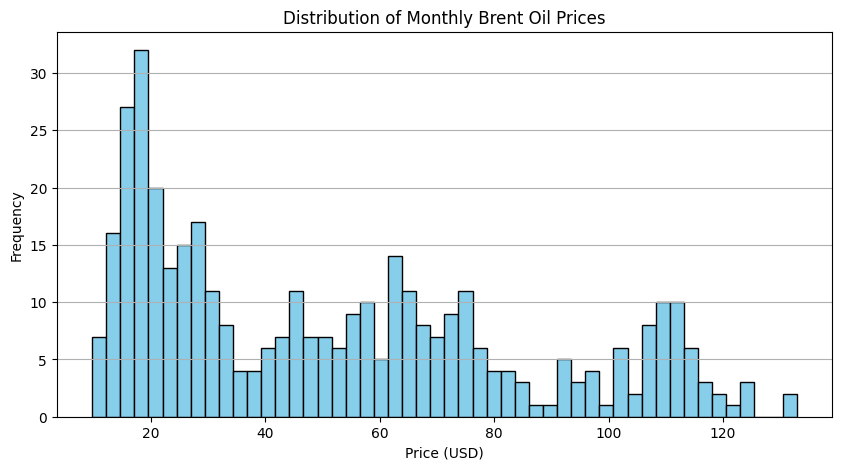

In [14]:
plt.figure(figsize=(10,5))
plt.hist(df_monthly['Price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Monthly Brent Oil Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


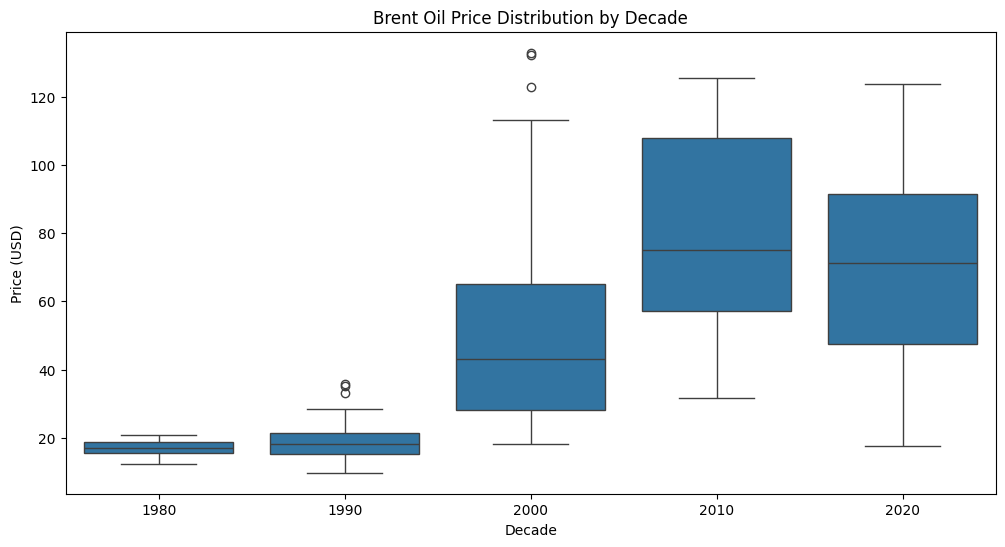

In [15]:
df_monthly['Decade'] = (df_monthly.index.year // 10) * 10

import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(x='Decade', y='Price', data=df_monthly.reset_index())
plt.title('Brent Oil Price Distribution by Decade')
plt.xlabel('Decade')
plt.ylabel('Price (USD)')
plt.show()


40
0


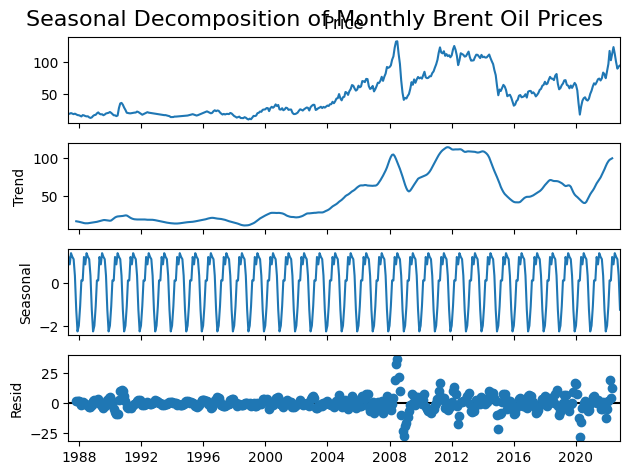

In [18]:
print(df_monthly['Price'].isna().sum())
df_monthly['Price'] = df_monthly['Price'].interpolate(method='linear')
print(df_monthly['Price'].isna().sum())
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_monthly['Price'], model='additive', period=12)
result.plot()
plt.suptitle('Seasonal Decomposition of Monthly Brent Oil Prices', fontsize=16)
plt.show()


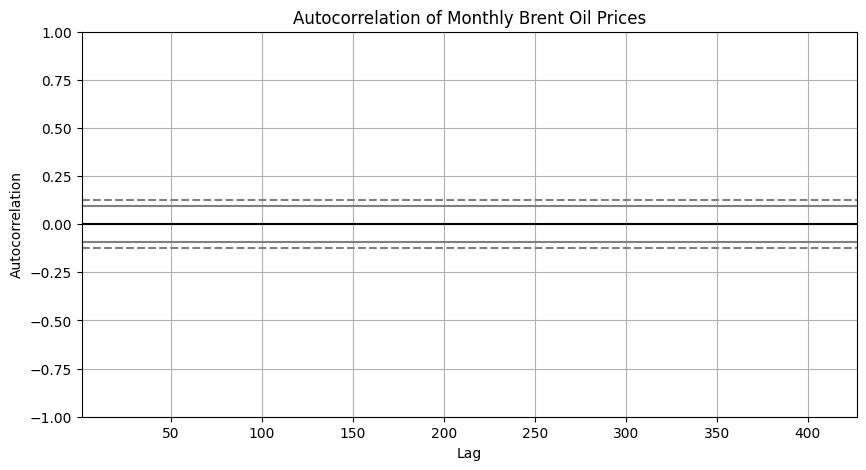

In [17]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(10,5))
autocorrelation_plot(df_monthly['Price'])
plt.title('Autocorrelation of Monthly Brent Oil Prices')
plt.show()
